### Import Dependencies

In [ ]:
from pydantic import BaseModel

from langgraph.graph import StateGraph, START, END


from typing import Dict, Literal

from IPython.display import display


import random

### Simple Single Node Graph

In [8]:
class State(BaseModel):
    message: str
    answer: str = ""
    vibe: str

In [9]:
def append_vibes_to_query(state: State) -> Dict:
    return {"answer": f"{state.message} {state.vibe}"}

In [10]:
workflow = StateGraph(State)

workflow.add_node("append_vibes", append_vibes_to_query)
workflow.add_edge(START, "append_vibes")
workflow.add_edge("append_vibes", END)

graph = workflow.compile()

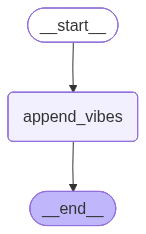

In [11]:
display(graph)

In [12]:
initial_state = {
    "message": "Give me some vibes!",
    "vibe": "I'm feeling like a badass today",
}

In [13]:
result = graph.invoke(initial_state)

In [14]:
result

{'message': 'Give me some vibes!',
 'answer': "Give me some vibes! I'm feeling like a badass today",
 'vibe': "I'm feeling like a badass today"}

### Conditional Graph

In [15]:
class State(BaseModel):
    message: str
    answer: str = ""

In [16]:
def append_vibes_to_query(state: State) -> Dict:
    return {"answer": "I'm here to add some vibes"}

In [17]:
def router(state: State) -> Literal["append_vibe_1", "append_vibe_2", "append_vibe_3"]:
    vibes = ["append_vibe_1", "append_vibe_2", "append_vibe_3"]
    return random.choice(vibes)

In [18]:
def append_vibe_1(state: State) -> Dict:
    vibe = "I'm feeling like a badass today"
    return {"answer": f"{state.answer} {state.message} {vibe}"}


def append_vibe_2(state: State) -> Dict:
    vibe = "I'm feeling like a boss today"
    return {"answer": f"{state.answer} {state.message} {vibe}"}


def append_vibe_3(state: State) -> Dict:
    vibe = "I'm feeling like a legend today"
    return {"answer": f"{state.answer} {state.message} {vibe}"}

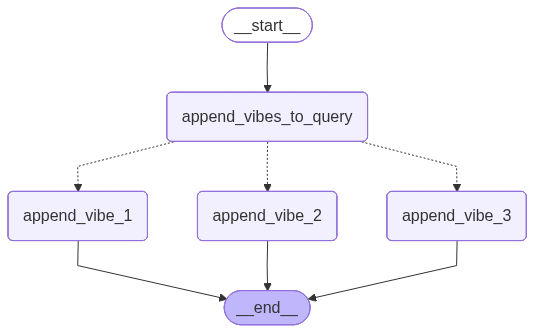

In [19]:
workflow = StateGraph(State)

workflow.add_node("append_vibes_to_query", append_vibes_to_query)
workflow.add_node("append_vibe_1", append_vibe_1)
workflow.add_node("append_vibe_2", append_vibe_2)
workflow.add_node("append_vibe_3", append_vibe_3)


workflow.add_edge(START, "append_vibes_to_query")
workflow.add_conditional_edges("append_vibes_to_query", router)

workflow.add_edge("append_vibe_1", END)
workflow.add_edge("append_vibe_2", END)
workflow.add_edge("append_vibe_3", END)


graph = workflow.compile()
display(graph)

In [24]:
initial_state = {
    "message": "Give me some vibes!",
}

In [32]:
result = graph.invoke(initial_state)

result

{'message': 'Give me some vibes!',
 'answer': "I'm here to add some vibes Give me some vibes! I'm feeling like a legend today"}